How is the data distributed? (10 %)

What are the summary statistics? (10 %)

Are there anomalies/outliers? (10 %)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df=pd.read_csv("cleanData.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
df.describe(include='object')

,CHROM,REF,ALT,CLNDISDB,CLNDN,CLNHGVS,CLNVC,CLNVI,MC,Allele,...,Feature_type,Feature,BIOTYPE,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,BAM_EDIT
count,44572,44572,44572,44572,44572,44572,44572,44572,44572,44572,...,44572,44572,44572,44572,44572,44572,44572,44572,44572,44572
unique,23,273,117,6093,6095,44572,6,15357,64,96,...,1,1864,1,3037,12209,11986,6511,581,1285,2
top,2,C,T,MedGen:CN169374,not_specified,NC_000013.10:g.20797131C>T,single_nucleotide_variant,No Variant,SO:0001583|missense_variant,T,...,Transcript,NM_001267550.1,protein_coding,16/16,452,696,1,L,Cga/Tga,OK
freq,6812,15394,14401,3202,3202,1,43331,29215,21529,14278,...,44572,2367,44572,1031,24,34,84,1850,686,44407


In [31]:
df.describe()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW
count,4.457200e+04,44572.000000,44572.000000,44572.000000,44572.000000,44572.000000,44572.000000,44572.000000,44572.000000,44572.000000
mean,8.010918e+07,0.010081,0.009889,0.010461,1.283923,0.244481,0.012519,0.356614,16.592506,2.775809
std,6.056906e+07,0.047918,0.049353,0.049282,5.950458,0.429784,0.999933,0.366361,10.899270,3.106015
min,1.932450e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000069,0.001000,-5.477391
25%,3.291106e+07,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.023500,8.447750,0.642709
50%,6.172510e+07,0.000000,0.000030,0.000000,1.000000,0.000000,1.000000,0.171000,15.200000,1.835875
75%,1.191568e+08,0.000700,0.000690,0.000800,1.000000,0.000000,1.000000,0.752000,24.500000,4.639156
max,2.476080e+08,0.499000,0.499890,0.496800,513.000000,1.000000,1.000000,1.000000,81.000000,34.236720


In [23]:
df_categorical=pd.DataFrame()
df_numerical=pd.DataFrame()
for i in range(len(df.columns)):
    if (df.dtypes[i]==object):
        df[df.columns[i]]=df[df.columns[i]].astype('str')
        if(len(np.unique(df[df.columns[i]]))<30):
            df_categorical[df.columns[i]]=df[df.columns[i]]
    else:
        df_numerical[df.columns[i]]=df[df.columns[i]]

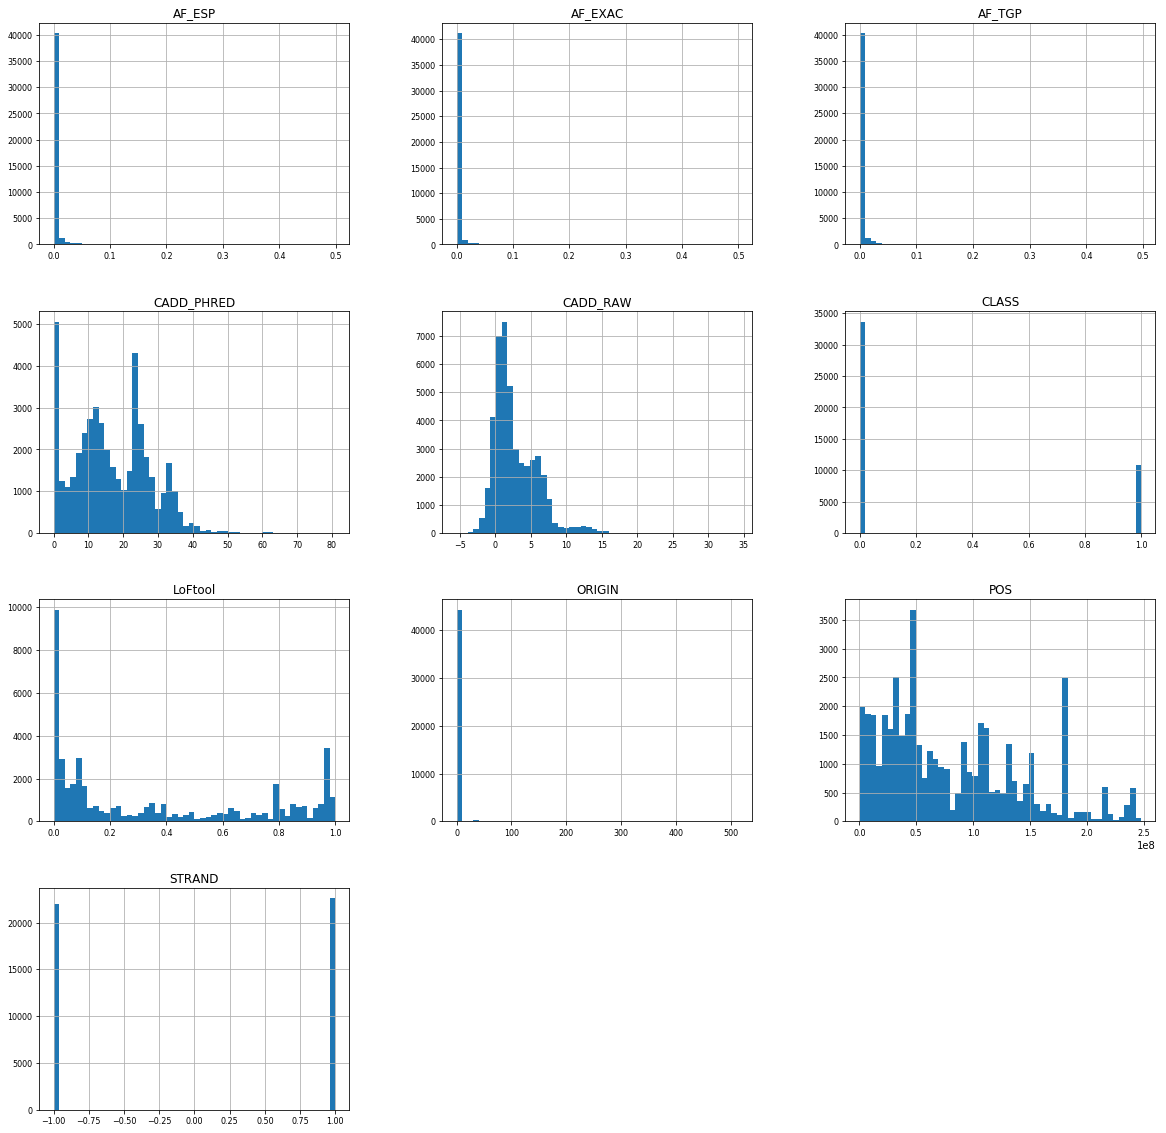

In [15]:
plt.close('all')
df.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.show()

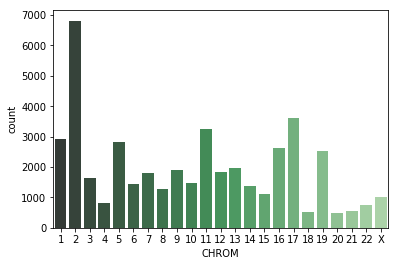

<Figure size 1440x1440 with 0 Axes>

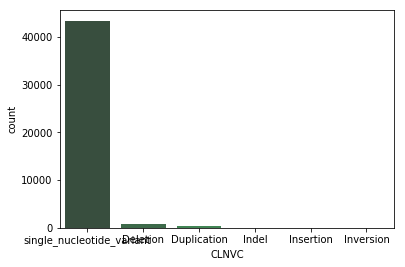

<Figure size 1440x1440 with 0 Axes>

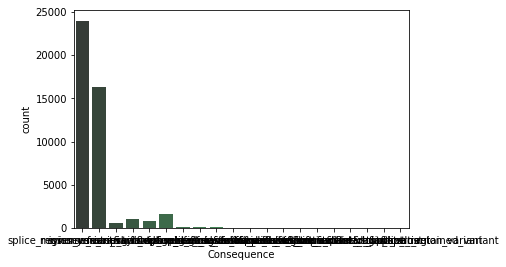

<Figure size 1440x1440 with 0 Axes>

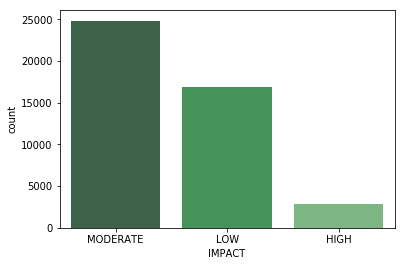

<Figure size 1440x1440 with 0 Axes>

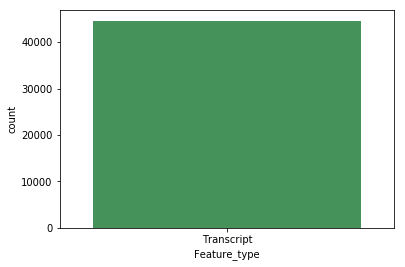

<Figure size 1440x1440 with 0 Axes>

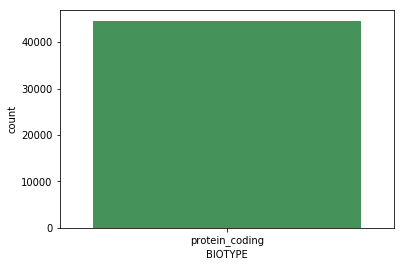

<Figure size 1440x1440 with 0 Axes>

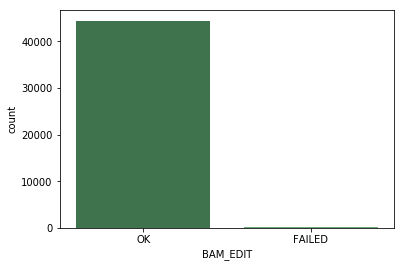

<Figure size 1440x1440 with 0 Axes>

In [22]:
plt.close('all')
for c in df_categorical.columns:
    sns.countplot(x=df_categorical[c], data=df_categorical, palette="Greens_d")
    plt.figure(figsize=(20,20))
    plt.show()

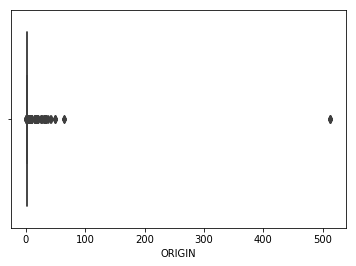

In [24]:
import seaborn as sns
sns.boxplot(x=df['ORIGIN'])

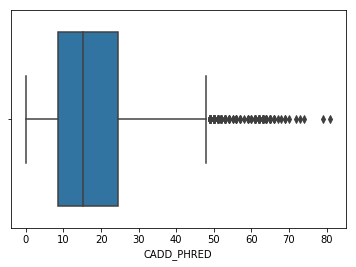

In [27]:
sns.boxplot(x=df['CADD_PHRED'])

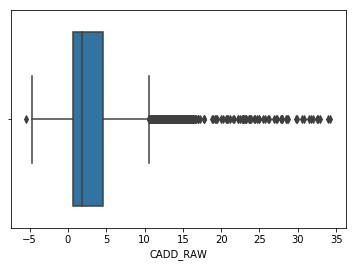

In [28]:
sns.boxplot(x=df['CADD_RAW'])

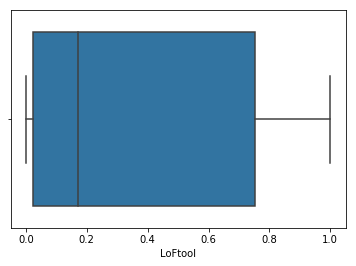

In [29]:
sns.boxplot(x=df['LoFtool'])

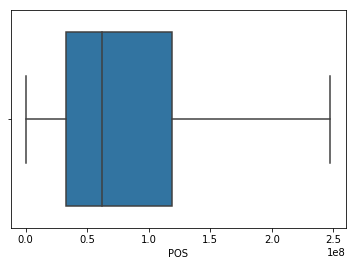

In [30]:
sns.boxplot(x=df['POS'])

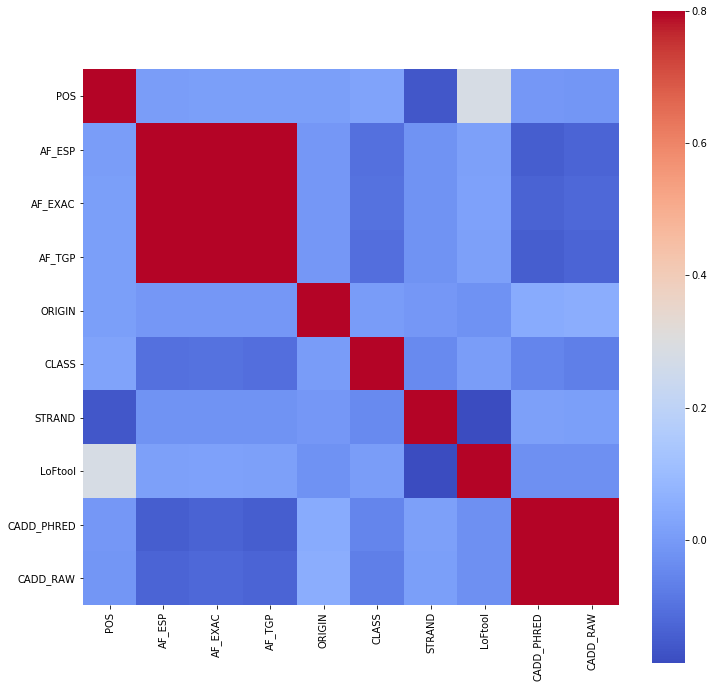

In [32]:
from matplotlib.pyplot import cm
plt.close('all')
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmax=.8, square=True, cmap=cm.coolwarm)
plt.show()

In [34]:
#for correlation between the categorical variables, refer to the analysis notebook

In [5]:
gene_ct = pd.crosstab(df.SYMBOL, df.CLASS, margins=True)

In [7]:
gene_ct.drop('All', axis=0, inplace=True)

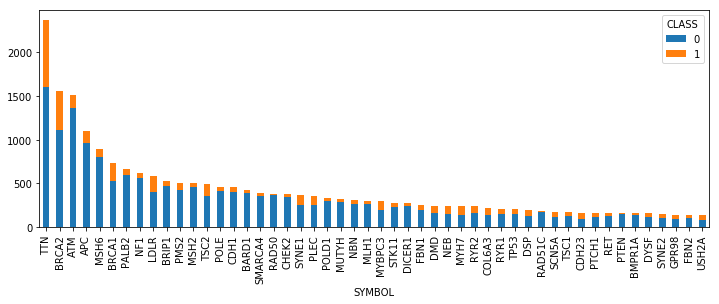

In [9]:
gene_ct = gene_ct.sort_values(by='All', ascending=False).head(50)
gene_ct.drop('All', axis=1, inplace=True)

gene_ct.plot.bar(stacked=True, figsize=(12, 4));

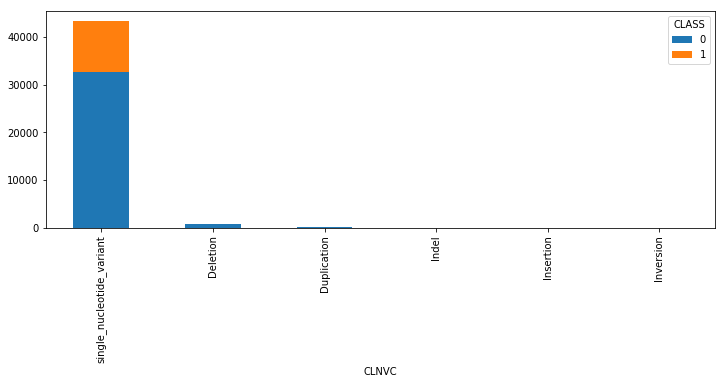

In [10]:
vt_ct = pd.crosstab(df.CLNVC, df.CLASS, margins=True)
vt_ct.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
vt_ct = vt_ct.sort_values(by='All', ascending=False)
vt_ct.drop('All', axis=1, inplace=True)

vt_ct.plot.bar(stacked=True, figsize=(12, 4));

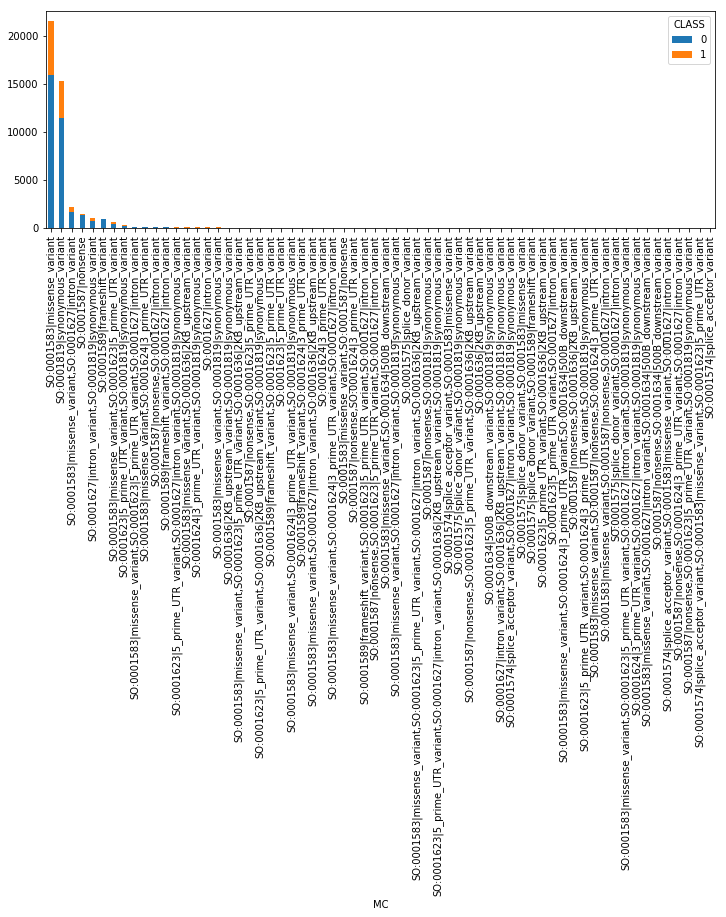

In [11]:
mc_ct=pd.crosstab(df.MC, df.CLASS, margins=True)
mc_ct.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
mc_ct = mc_ct.sort_values(by='All', ascending=False)
mc_ct.drop('All', axis=1, inplace=True)

mc_ct.plot.bar(stacked=True, figsize=(12, 4));

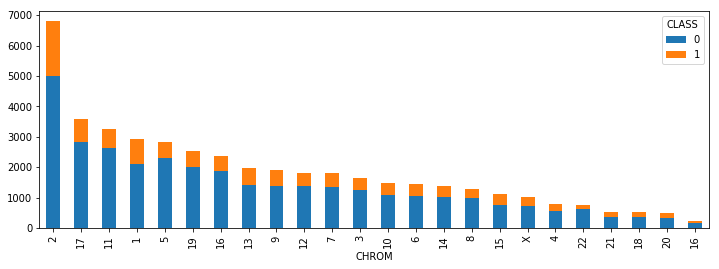

In [19]:
CH_ct=pd.crosstab(df.CHROM, df.CLASS, margins=True)
CH_ct.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
CH_ct = CH_ct.sort_values(by='All', ascending=False)
CH_ct.drop('All', axis=1, inplace=True)

CH_ct.plot.bar(stacked=True, figsize=(12, 4));

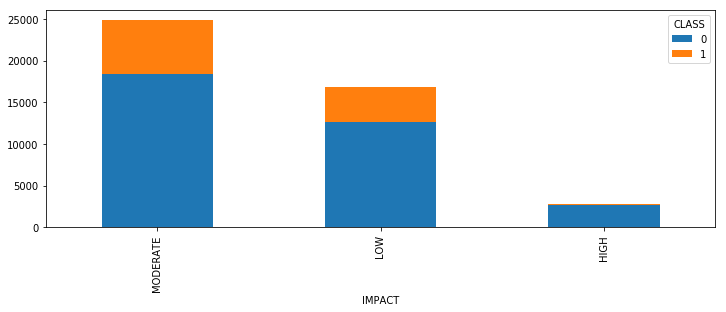

In [20]:
im_ct=pd.crosstab(df.IMPACT, df.CLASS, margins=True)
im_ct.drop('All', axis=0, inplace=True)

# limit to the 50 most submitted genes for visualization
im_ct = im_ct.sort_values(by='All', ascending=False)
im_ct.drop('All', axis=1, inplace=True)

im_ct.plot.bar(stacked=True, figsize=(12, 4));